# Méthode pour rejoindre un point, en arrivant avec certitude avec un certain angle

In [13]:
# d'abord, les utilitaires

In [9]:
import math
# en français pour Xavier !

def rotation(x,y,xo,yo,theta): #rotate x,y around xo,yo by theta (rad)
    xr=math.cos(theta)*(x-xo)-math.sin(theta)*(y-yo)   + xo
    yr=math.sin(theta)*(x-xo)+math.cos(theta)*(y-yo)  + yo
    return  (xr, yr)

AVANCE = 0
RECULE = 1
AVANT_DROIT = 2
AVANT_GAUCHE = 3
ARRIERE_DROIT = 4
ARRIERE_GAUCHE = 5
STARTING = 6

MANOEUVRES_TEXTE = ["AVANCE","RECULE","AVANT_DROIT","AVANT_GAUCHE","ARRIERE_DROIT","ARRIERE_GAUCHE","STARTING"]
COULEURS = ['tab:blue', 'tab:orange', "tab:green", 'tab:red', 'tab:purple', 'tab:brown', 'k'] # couleurs des flèches

# pour fonction "tresProche". Si < epsilon, les points sont considérés comme étant confondus
epsilonMetres = 0.05
epsilonRad = 0.08726646259971647    # 5 degrés


class PointAngle:
    # k => noir
    def __init__(self, x, y, angleRad, distanceParcourue = 0, pere = None, couleur = STARTING):
        self.x = x
        self.y = y
        if angleRad <= -math.pi:
            self.angleRad = angleRad + 2.0*math.pi
        elif angleRad > math.pi:
            self.angleRad = angleRad - 2.0 * math.pi
        else:
            self.angleRad = angleRad
        self.distanceParcourue = distanceParcourue
        self.pere = pere
        self.couleur = couleur
        self.estimation = 0  # renseignée par l'algo A*
    def __str__(self):
        return 'x : ' + str(self.x) + ', y : ' + str(self.y) + ', angle : ' + str(self.angleRad * 180/math.pi) + 'deg'

    def vecteurAngle(self):
        return (math.cos(self.angleRad), math.sin(self.angleRad))

    def vecteurAngleDroite(self):
        v = self.vecteurAngle()
        return (v[1], -v[0])

    def vecteurAngleGauche(self):
        v = self.vecteurAngle()
        return (-v[1], v[0])

    def avance(self, pas):
        xFils = self.x + self.vecteurAngle()[0] * pas
        yFils = self.y + self.vecteurAngle()[1] * pas
        return PointAngle(xFils, yFils, self.angleRad, self.distanceParcourue + pas, self, AVANCE)
    
    def recule(self, pas):
        xFils = self.x - self.vecteurAngle()[0] * pas
        yFils = self.y - self.vecteurAngle()[1] * pas
        return PointAngle(xFils, yFils, self.angleRad, self.distanceParcourue + pas, self, RECULE)

    def avantDroit(self, pas, rayonBraquage):
        angleRotation = - pas / rayonBraquage # vers ma droite => sens horaire => anti sens trigo
        # droite : x,y => y, -x
        vecteurAngleDroite = self.vecteurAngleDroite()
        xCentre = self.x + rayonBraquage * vecteurAngleDroite[0]
        yCentre = self.y + rayonBraquage * vecteurAngleDroite[1]
        position = rotation(self.x, self.y, xCentre, yCentre, angleRotation)
        return PointAngle(position[0], position[1], self.angleRad + angleRotation, self.distanceParcourue + pas, self, AVANT_DROIT)
    
    def avantGauche(self, pas, rayonBraquage):
        angleRotation = pas / rayonBraquage # vers ma gauche => trigo
        # droite : x,y => y, -x
        vecteurAngle = self.vecteurAngleGauche()
        xCentre = self.x + rayonBraquage * vecteurAngle[0]
        yCentre = self.y + rayonBraquage * vecteurAngle[1]
        position = rotation(self.x, self.y, xCentre, yCentre, angleRotation)
        return PointAngle(position[0], position[1], self.angleRad + angleRotation, self.distanceParcourue + pas, self, AVANT_GAUCHE)

        
    def arriereDroit(self, pas, rayonBraquage):
        angleRotation = pas / rayonBraquage # vers ma droite => sens horaire => anti sens trigo
        # droite : x,y => y, -x
        vecteurAngleDroite = self.vecteurAngleDroite()
        xCentre = self.x + rayonBraquage * vecteurAngleDroite[0]
        yCentre = self.y + rayonBraquage * vecteurAngleDroite[1]
        position = rotation(self.x, self.y, xCentre, yCentre, angleRotation)
        return PointAngle(position[0], position[1], self.angleRad + angleRotation, self.distanceParcourue + pas, self, ARRIERE_DROIT)

    def arriereGauche(self, pas, rayonBraquage):
        angleRotation = - pas / rayonBraquage
        # droite : x,y => y, -x
        vecteurAngle = self.vecteurAngleGauche()
        xCentre = self.x + rayonBraquage * vecteurAngle[0]
        yCentre = self.y + rayonBraquage * vecteurAngle[1]
        position = rotation(self.x, self.y, xCentre, yCentre, angleRotation)
        return PointAngle(position[0], position[1], self.angleRad + angleRotation, self.distanceParcourue + pas, self, ARRIERE_GAUCHE)
    
    def bouge(self, mouvement, pas, rayonBraquage, nombreDeFois = 1):
        if mouvement == AVANCE:
            resultat = self.avance(pas) 
        elif mouvement == RECULE:
            resultat = self.recule( pas)
        elif mouvement == AVANT_DROIT:
            resultat = self.avantDroit(pas, rayonBraquage)
        elif mouvement == AVANT_GAUCHE:
            resultat = self.avantGauche(pas, rayonBraquage)
        elif mouvement == ARRIERE_DROIT:
            resultat = self.arriereDroit(pas, rayonBraquage)
        elif mouvement == ARRIERE_GAUCHE:
            resultat = self.arriereGauche(pas, rayonBraquage)
        else:
            raise "mouvement inconnu"
        if nombreDeFois == 1:
            return resultat
        else:
            return resultat.bouge(mouvement, pas, rayonBraquage, nombreDeFois - 1)
    
    @staticmethod
    def mouvements():
        return (AVANCE,RECULE,AVANT_DROIT,AVANT_GAUCHE,ARRIERE_DROIT,ARRIERE_GAUCHE,)
    
    def couleurTexte(self):
        return COULEURS[self.couleur]
    
    def tresProche(self, p2):
        return abs(self.x - p2.x) < epsilonMetres and abs(self.y - p2.y) < epsilonMetres and abs(self.angleRad - p2.angleRad) < epsilonRad

# Fonction

In [15]:
import IPython
IPython.display.IFrame("https://www.geogebra.org/m/wcrswh9f", width = "80%", height="750px")

In [288]:
def manoeuvresSansAngles(depart, arrivee, rayonBraquage = 1.90, detourDepartPossible = False, detourArriveePossible = False, departQueEnAvant = False, departQueEnArriere = False, queLaPlusCourte = False):
    if departQueEnArriere and departQueEnAvant:
        raise "euh faut savoir c'que tu veux en fait"
        
    xRefBraquage = arrivee.x
    yRefBraquage = arrivee.y
    #translation
    xRefBraquage -= depart.x
    yRefBraquage -= depart.y
    # scale
    xRefBraquage /= rayonBraquage
    yRefBraquage /= rayonBraquage
    #rotation
    angleRefBraquage = arrivee.angleRad - depart.angleRad
    (xRefBraquage, yRefBraquage) = rotation(xRefBraquage, yRefBraquage, 0, 0, -depart.angleRad)
    pointAngleArriveeRefBraquage = PointAngle(xRefBraquage, yRefBraquage, angleRefBraquage)

    manoeuvres = []
    
    manoeuvres.append(tangenteDroite(pointAngleArriveeRefBraquage, True, True))
    manoeuvres.append(tangenteDroite(pointAngleArriveeRefBraquage, True, False))
    manoeuvres.append(tangenteDroite(pointAngleArriveeRefBraquage, False, True))
    manoeuvres.append(tangenteDroite(pointAngleArriveeRefBraquage, False, False))
    
    ajouteSiDefini(pointAngleArriveeRefBraquage, True, True, manoeuvres)
    ajouteSiDefini(pointAngleArriveeRefBraquage, True, False, manoeuvres)
    ajouteSiDefini(pointAngleArriveeRefBraquage, True, True, manoeuvres)
    ajouteSiDefini(pointAngleArriveeRefBraquage, True, True, manoeuvres)
    
    nbrManoeuvresDeBase = len(manoeuvres)
    i = 0
    while i != nbrManoeuvresDeBase:
        if detourDepartPossible:
            manoeuvres.append(detour(manoeuvres[i], True, False))
        if detourArriveePossible:
            manoeuvres.append(detour(manoeuvres[i], False, True))
        if detourDepartPossible and detourArriveePossible:
            manoeuvres.append(detour(manoeuvres[i], True, True))
        i += 1
    # ajouter les variations avant / arriere   
    # selectionner la plus courte si besoin
    
    # rescale tout par rayonBraquage, et filtrage
    res = []
    for manoeuvre in manoeuvres:
        if ( (not departQueEnArriere and not departQueEnAvant) 
        or (departQueEnArriere and (manoeuvre[0][0] == ARRIERE_DROIT or manoeuvre[0][0] == ARRIERE_GAUCHE) ) 
        or (departQueEnAvant and (manoeuvre[0][0] == AVANT_DROIT or manoeuvre[0][0] == AVANT_GAUCHE) ) ):
            newManoeuvre = []
            for mouvement in manoeuvre:
                newManoeuvre.append(  (mouvement[0], mouvement[1] * rayonBraquage))
            res.append(newManoeuvre)
    
    if queLaPlusCourte:
        meilleurTotalMouvements = math.inf
        meilleureManoeuvre = None
        for manoeuvre in res:
            totalMouvements = manoeuvre[0][1] + manoeuvre[1][1] + manoeuvre[2][1]
            if totalMouvements < meilleurTotalMouvements:
                meilleurTotalMouvements = totalMouvements
                meilleureManoeuvre = manoeuvre
        return [meilleureManoeuvre]
    else:
        return res

def inverse(m):
    if m == AVANT_DROIT:
        return ARRIERE_DROIT
    elif m == AVANT_GAUCHE:
        return ARRIERE_GAUCHE
    elif m == ARRIERE_DROIT:
        return AVANT_DROIT
    elif m == ARRIERE_GAUCHE:
        return AVANT_GAUCHE
    else:
        raise "pas supposé etre utilisé pour AVANCE/RECULE"

def detour(manoeuvre, depart, arrivee):
    mouvement1 = manoeuvre[0]
    mouvement3 = manoeuvre[2]
    if depart:
        mouvement1 = (inverse(mouvement1[0]), 2*math.pi - mouvement1[1])
    if arrivee:
        mouvement3 = (inverse(mouvement3[0]), 2*math.pi - mouvement3[1])
    return [mouvement1, manoeuvre[1], mouvement3]

                      
def mouvementRond(coteGauche, enAvant):
    if coteGauche:
        if enAvant:
            return AVANT_GAUCHE
        else:
            return ARRIERE_GAUCHE
    else:
        if enAvant:
            return AVANT_DROIT
        else:
            return ARRIERE_DROIT

def regulAngle(angle):
    if angle < -math.pi:
        return angle + 2.0*math.pi
    elif angle > math.pi:
        return angle - 2.0*math.pi
    else:
        return angle

    
# mouvementPendant = tuple
# manoeuvres = tuple de mouvementsPendant
# Si depart cote gauche, arrivee cote gauche. (Sinon, on change de sens)
# deux manoeuvre différentes. Une ou on avance, l'autre ou on recule

def tangenteDroite(pointAngleArrivee, departCoteGauche, avancerAuMilieu):
    if departCoteGauche:
        positifSiCoteGauche = 1
        yCentreCercleDepart = 1
        xCentreCercleArrivee = pointAngleArrivee.x + pointAngleArrivee.vecteurAngleGauche()[0]
        yCentreCercleArrivee = pointAngleArrivee.y + pointAngleArrivee.vecteurAngleGauche()[1]
    else:
        positifSiCoteGauche = -1
        yCentreCercleDepart = -1
        xCentreCercleArrivee = pointAngleArrivee.x + pointAngleArrivee.vecteurAngleDroite()[0]
        yCentreCercleArrivee = pointAngleArrivee.y + pointAngleArrivee.vecteurAngleDroite()[1]
    
    # segment = segment tangent d'un cercle à l'autre. Il fait la même longueur que celui qui relie les centre des deux cercles, et est parallèle, donc même angle
    dySegment = yCentreCercleArrivee - yCentreCercleDepart
    longueurSegment =  ( xCentreCercleArrivee**2 + dySegment**2 ) **0.5
        
    angle = math.atan2( dySegment, xCentreCercleArrivee) # car xSegment = 0, donc dxSegment = xCetnreCercleArrivee - 0
    mouvementMilieu = AVANCE
    if not avancerAuMilieu:
        mouvementMilieu = RECULE
        angle = regulAngle(angle + math.pi) # un demi tour en plus, on est obligés de repartir dans l'autre sens !
        
    mouvement1 = mouvementRond(departCoteGauche, (positifSiCoteGauche * angle) > 0)
    angleArrivee = regulAngle(pointAngleArrivee.angleRad - angle)
    mouvement3 = mouvementRond(departCoteGauche,  (positifSiCoteGauche * angleArrivee) > 0)
    return ( (mouvement1, abs(angle)), (mouvementMilieu, longueurSegment), (mouvement3, abs(angleArrivee) ) )


# Si depart côté gauche, arrivée côté droit, car on fait un demi-tour
def tangenteCroisee(pointAngleArrivee, departCoteGauche, avancerAuMilieu):
    if departCoteGauche:
        positifSiDepartGauche = 1
        yCentreCercleDepart = 1
        xCentreCercleArrivee = pointAngleArrivee.x + pointAngleArrivee.vecteurAngleDroite()[0]
        yCentreCercleArrivee = pointAngleArrivee.y + pointAngleArrivee.vecteurAngleDroite()[1]
    else:
        positifSiDepartGauche = -1
        yCentreCercleDepart = -1
        xCentreCercleArrivee = pointAngleArrivee.x + pointAngleArrivee.vecteurAngleGauche()[0]
        yCentreCercleArrivee = pointAngleArrivee.y + pointAngleArrivee.vecteurAngleGauche()[1]
    
    dySegment = yCentreCercleArrivee - yCentreCercleDepart
    longueurSegment =  ( xCentreCercleArrivee**2 + dySegment**2 ) **0.5
    angleSegment = math.atan2( dySegment, xCentreCercleArrivee) # car xSegment = 0, donc dxSegment = xCetnreCercleArrivee - 0
    
    if longueurSegment <= 2.0:
        return None
    else:
        angleTangente = math.asin(2.0 / longueurSegment) # asin d'un truc positif : entre 0 et pi / 2
        # pythagore : demiTangente**2 + 1 = (longueurSegment/2)**2
        #             demiTangente = sqrt( longueurSegment/2)**2 -1)
        longueurTangente = 2.0 * ( (longueurSegment/2.0)**2 -1 )**0.5
        
        if avancerAuMilieu:
            mouvementMilieu = AVANCE
            angleDepart = regulAngle(angleSegment + angleTangente)
        else:
            mouvementMilieu = RECULE
            angleDepart = regulAngle(math.pi + angleSegment - angleTangente)
               
        mouvement1 = mouvementRond(departCoteGauche, (positifSiDepartGauche * angleDepart) > 0)
        
        angleArrivee = regulAngle(pointAngleArrivee.angleRad - angleDepart)
        
        mouvement3 = mouvementRond(not departCoteGauche,  not (positifSiDepartGauche * angleArrivee > 0) )
        return ( (mouvement1, abs(angleDepart) ), (mouvementMilieu, longueurTangente), (mouvement3, abs(angleArrivee) ) )
    
def ajouteSiDefini(pointAngleArriveeRefBraquage, departCoteGauche, avancerAuMilieu, manoeuvres):
        tangente = tangenteCroisee(pointAngleArriveeRefBraquage, departCoteGauche, avancerAuMilieu)
        if tangente != None:
            manoeuvres.append(tangente)

In [263]:
import matplotlib.pyplot as plt
import numpy as np

def afficherManoeuvres(depart, arrivee, rayonBraquage = 1.90, detourDepartPossible = False, detourArriveePossible = False, departQueEnAvant = False, departQueEnArriere = False, queLaPlusCourte = False):
    pas = 0.2
    epsilon = 0.00001
    
    manoeuvres= manoeuvresSansAngles(depart, arrivee, 1.90, detourDepartPossible, detourArriveePossible, departQueEnAvant, departQueEnArriere, queLaPlusCourte)
    couleurs = ['orange', 'darkgoldenrod', 'green', 'darkgreen', 'violet', 'darkviolet', 'grey', 'black']
    
    print(manoeuvres)
    pointsParMouvement = []
    for i, manoeuvre in enumerate(manoeuvres):
        if i < len(couleurs):
            couleur = couleurs[i]
        else:
            couleur = "red"
        fleches = [depart]
        for mouvement in manoeuvre:
            departMouvement = fleches[-1]
            distanceParcourue = 0
            while distanceParcourue < mouvement[1]:
                fleches.append(fleches[-1].bouge(mouvement[0], pas, rayonBraquage))
                distanceParcourue += pas
            fleches.append(departMouvement.bouge(mouvement[0], mouvement[1], rayonBraquage))
        fin = fleches[-1]
        if abs(fin.x - arrivee.x) < epsilon and abs(fin.y - arrivee.y) < epsilon and abs(fin.angleRad - arrivee.angleRad) < epsilon:
            print("bien arrivé !")
        else:
            print("FAIL")
            print(fin.x, fin.y, fin.angleRad, fin.angleRad * 180/math.pi)
        pointsParMouvement.append( (fleches, couleur) )

    pltX = []
    pltY = []
    pltU = []
    pltV = []
    pltCouleur = []

    for (i, (points, couleur)) in enumerate(pointsParMouvement):
        
        for point in points:
            pltX.append(point.x)
            pltY.append(point.y)
            pltU.append(point.vecteurAngle()[0])
            pltV.append(point.vecteurAngle()[1])
            pltCouleur.append(couleur )

    plt.figure(figsize=(12,12))
    plt.gca().set_aspect('equal', adjustable='box')
    plt.quiver(np.array(pltX), np.array(pltY), np.array(pltU), np.array(pltV), color = pltCouleur, width=0.003, )


[[(5, 0.2884829211313744), (0, 7.561745830163824), (4, 3.272995942041678)]]
bien arrivé !


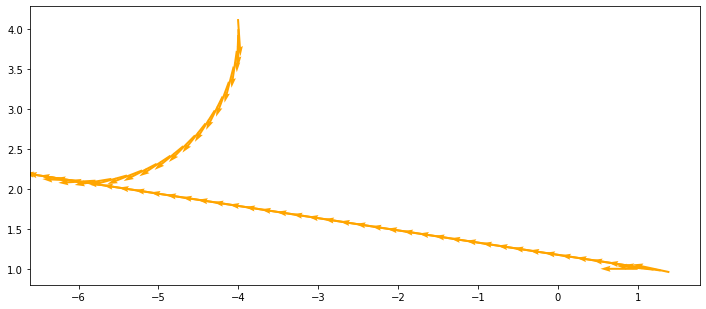

In [287]:
detourDepartPossible = True
detourArriveePossible = True
departQueEnAvant = False
departQueEnArriere = True
queLaPlusCourte = True

afficherManoeuvres(PointAngle(1,1,math.pi), PointAngle(-4, 4, -math.pi/2), 1.90, detourDepartPossible, detourArriveePossible, departQueEnAvant, departQueEnArriere, queLaPlusCourte)